<a href="https://colab.research.google.com/github/lfast1/CHE30324/blob/master/Coding_Controllers_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding Controllers Part 2

## Basic Control Implementation using Python Generators

In [0]:
def Tsetpoint(t):
    if t <= 200:
        Tsp = 50
    elif t > 200 and t <= 300:
        Tsp = 50 - 0.10*(t-200)
    elif t > 300 and t <= 500:
        Tsp = 40
    elif t > 500 and t <= 700:
        Tsp = 40 + 0.05*(t-500)
    else:
        Tsp = 50
    return Tsp

In [0]:
def relay(Qmin, Qmax):
    Q = 0
    while True:
        Tsp, T = yield Q
        Q = Qmax if T < Tsp else Qmin

TCLab version 0.4.8
Simulated TCLab


<IPython.core.display.Javascript object>


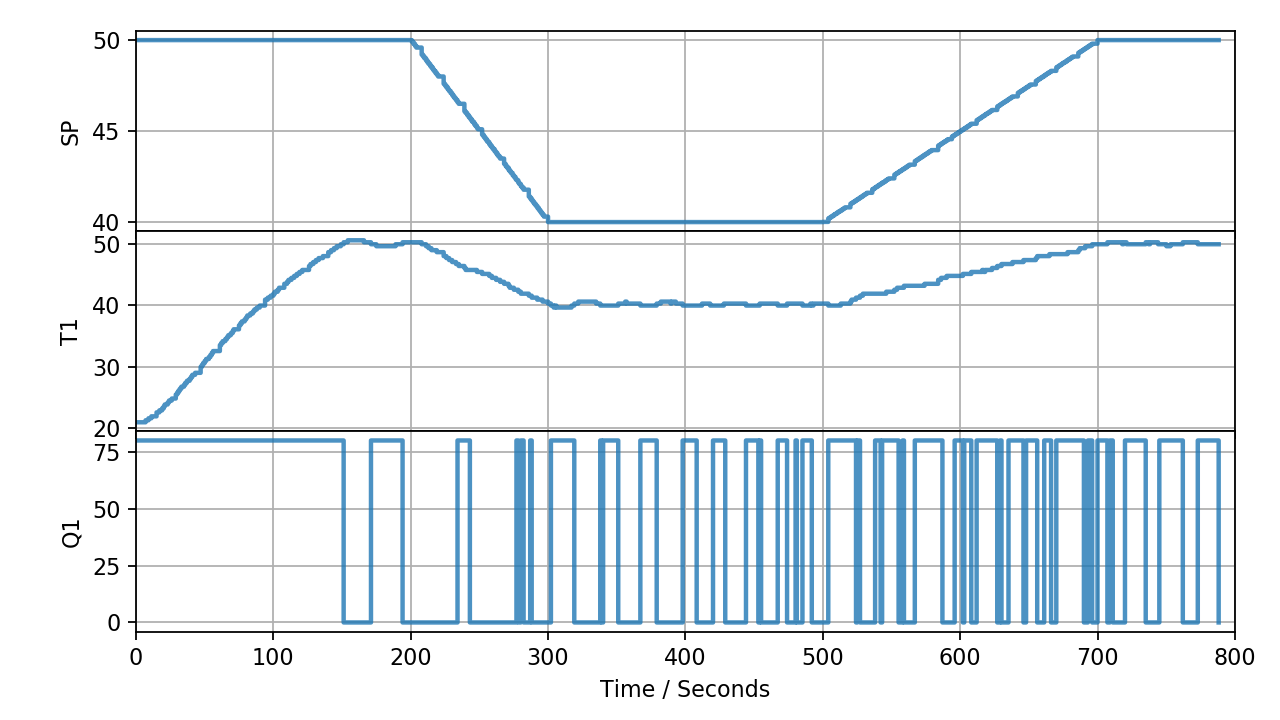

TCLab Model disconnected successfully.


In [0]:
%matplotlib notebook
from tclab import setup, clock, Historian, Plotter
TCLab = setup(connected=False, speedup=20)

tf = 800        # run time

controller = relay(0, 80)
controller.send(None)

with TCLab() as lab:
    h = Historian([('SP', lambda: Tsetpoint(t)),
                   ('T1', lambda: lab.T1),
                   ('Q1', lab.Q1)])
    p = Plotter(h, tf)
    for t in clock(tf):
        T1 = lab.T1                     # take measurement
        Tsp = Tsetpoint(t)              # get setpoint
        U1 = controller.send([Tsp, T1])   # compute control action
        lab.U1 = U1                     # set manipulated variable  
        p.update(t)                     # log data

## Previously Developed Model for TCLab

A = [[-0.01238245  0.00564263]
 [ 0.03673469 -0.03673469]]

B = [[0.31347962]
 [0.        ]]

C = [[0 1]]

D = [[0]]



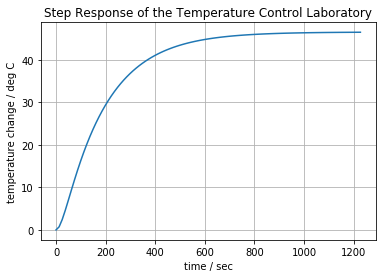

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control 

# parameter estimates
P =  0.04*50          # power input when the system is turned
Ua = 0.043         # the steady state temperaure increase is 35 deg C. 
CpH = 6.38  # assign 90% of the heat capacity to the heater
CpS = 0.98     # assign 90% of the heat capacity to the heater
Uc = 0.036          # 

# compute parameters for an equivalent state space model
A = [[-(Ua + Uc)/CpH, Uc/CpH], [Uc/CpS, -Uc/CpS]]
B = [[P/CpH], [0]] # single column
C = [[0, 1]]   # single row
D = [[0]]

# create the state space model object
tclab2 = control.StateSpace(A, B, C, D)
print(tclab2)

# perform the step response simulation returning vectors with time and output
t, y = control.step_response(tclab2)

# plot the results
plt.plot(t,y)
plt.xlabel('time / sec')
plt.ylabel('temperature change / deg C')
plt.title('Step Response of the Temperature Control Laboratory')
plt.grid(True)

In [0]:
import numpy as np
import control 

def model():
    # parameter estimates
    P =  0.04          # power input when the system is turned
    Ua = 0.043         # the steady state temperaure increase is 35 deg C. 
    CpH = 6.38  # assign 90% of the heat capacity to the heater
    CpS = 0.98     # assign 90% of the heat capacity to the heater
    Uc = 0.036          # 

    # compute parameters for an equivalent state space model
    A = [[-(Ua + Uc)/CpH, Uc/CpH], [Uc/CpS, -Uc/CpS]]
    B = [[P/CpH], [0]] # single column
    C = [[0, 1]]   # single row
    D = [[0]]

    # create the state space model object
    tclab2 = control.StateSpace(A, B, C, D)

    tprev = 0
    Qprev = 0
    xprev = [0, 0]
    while True:
        TH = xprev[0] + 22
        TS = xprev[1] + 22
        t, Q = yield TH
        t, y, x = control.forced_response(tclab2, [tprev, t], [Qprev, Q], xprev, transpose=True)
        tprev = t[-1]
        Qprev = Q
        xprev = x[-1]


TCLab version 0.4.8
Simulated TCLab


<IPython.core.display.Javascript object>


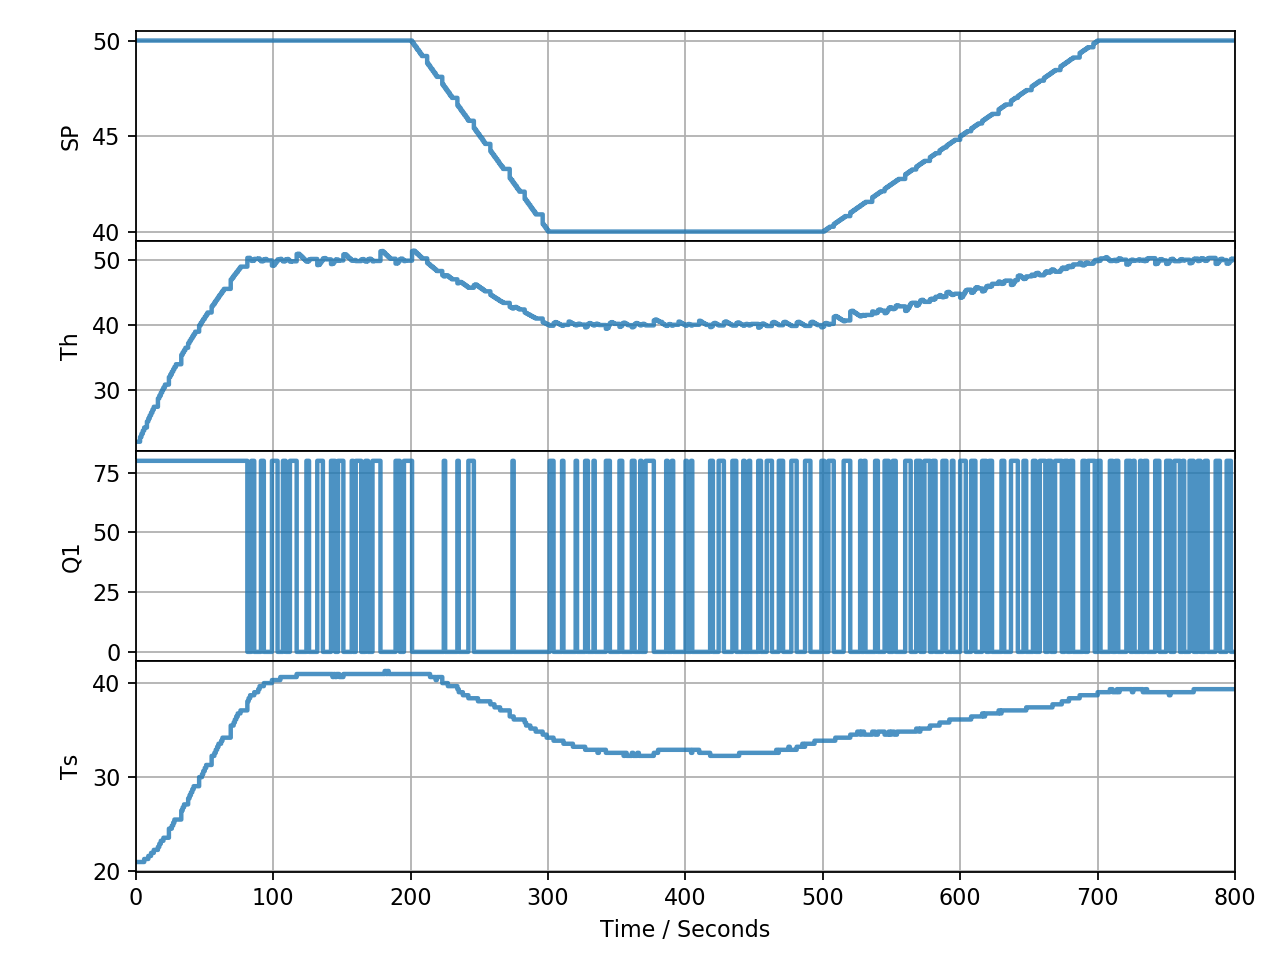

22.0
22.743233773490445
23.232801570879516
23.716585727270026
24.19474657363566
25.134808295455908
25.59699925486367
26.054147570790146
26.506384493065095
26.9538361672439
27.396623848780973
28.698146386932148
29.123399848467102
29.586418947067216
30.003122277116574
30.37479521468986
30.82483668949309
31.989823529366255
32.38457680676995
32.81482318853008
33.20241277006315
33.54841622609087
33.967744207439125
35.42403411412435
35.79008191698733
36.153232628569945
36.5135373711524
37.225804697345346
37.57786099904396
37.92725890396658
38.27404141631993
38.61825011097533
38.99395485960471
39.97013138894749
40.33511039017016
40.66444298056405
40.95886210953189
41.316195254981665
41.63867785878756
41.95893845999679
42.90667522303821
43.18725928952162
43.52790127658662
43.83541239692083
44.140888377308116
44.44435296045219
44.71577043812189
45.015476463049986
45.31323634832688
45.60907143502919
47.060083968427264
47.344788656424996
47.65589718068645
47.90884584047703
48.188232804675785
48.4

45.30948140785496
45.6806411749301
46.013955204455534
46.093714949455475
45.92407452422454
45.99828261422337
46.39446103047686
46.74655988131458
46.57162115511379
46.382013552395705
46.45388565988307
46.81441696085476
46.88851109348245
46.21859320568388
46.30218061808914
46.63362593908821
46.96121290164085
47.60523074086355
47.6787125698705
47.496381779713744
47.31663030392834
47.13937794252941
47.21430380507733
47.537282360687556
47.7999735998389
47.61888660335221
47.69004577810152
48.00932324648551
48.07523713152394
47.87374608475856
47.711164643061394
47.92650618308025
48.244678538218785
48.30948341717708
48.125069593515775
48.19974991323562
48.547113284318954
48.609399247871835
48.441086077906455
48.256521653415334
48.52269127228789
48.8366792631669
48.897357309962274
48.69016723728751
48.75427351637569
49.09761390028642
49.15628694489311
48.96583060216503
49.01531964262492
49.38720087622678
49.64553964875218
49.43247920696661
49.241572879049066
49.29682801482738
49.60649678270232


In [0]:
%matplotlib notebook
from tclab import setup, clock, Historian, Plotter
TCLab = setup(connected=False, speedup=20)

tf = 800        # run time

controller = relay(0, 80)
controller.send(None)

estimator = model()
estimator.send(None)


with TCLab() as lab:
    h = Historian([('SP', lambda: Tsetpoint(t)),
                   ('Th', lambda: Th),
                   ('Q1', lab.Q1),
                   ('Ts', lambda: lab.T1)])
    p = Plotter(h, tf)
    U1 = 0
    for t in clock(tf):
        T1 = lab.T1                     # take measurement
        Tsp = Tsetpoint(t)              # get setpoint
        Th = estimator.send([t, U1])
        print(Th)
        U1 = controller.send([Tsp, Th])   # compute control action
        lab.U1 = U1                     # set manipulated variable  
        p.update(t)                     # log data